In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_data_v3.csv")
customer_df = pd.read_csv("/Users/anastasia/Downloads/customer_interactions_data_v3.csv")
sales_df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C
1,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D
2,CUST0003,Enterprise,Asia,8198.55,2220.95,0,Renewed,Mid-Market,2021-12-13,Manager B
3,CUST0004,Enterprise,North America,6992.86,3933.71,0,Renewed,SMB,2021-07-08,Manager C
4,CUST0005,Basic,Asia,8516.95,3044.23,1,Renewed,Mid-Market,2022-08-01,Manager C


In [5]:
sub_reg_df = sales_df.groupby(["Region", "Subscription_Plan"]).agg({
    "Monthly_Profit":"sum",
    "Monthly_Revenue":"sum"
}).rename(columns={
    "Monthly_Profit":"Total_Monthly_Profit",
    "Monthly_Revenue":"Total_Monthly_Revenue"
})
display(sub_reg_df)

Total_Monthly_Profit  Total_Monthly_Revenue
Region        Subscription_Plan                                             
Africa        Basic                          26521.00               81161.09
              Enterprise                     13772.69               35083.14
              Pro                             9882.30               14720.99
Asia          Basic                          26196.65               69540.74
              Enterprise                     13975.84               48063.99
              Pro                            35533.50               82137.77
Europe        Basic                          23836.47               31978.09
              Enterprise                     16572.56               43200.99
              Pro                            19038.55               42103.53
North America Basic                          23151.09               67992.54
              Enterprise                     19588.84               61047.59
              Pro                            50723.23              104341.97
South America Basic                           8343.96               42300.86
              Enterprise                     44500.23               88512.60
              Pro                            19670.36               62205.37

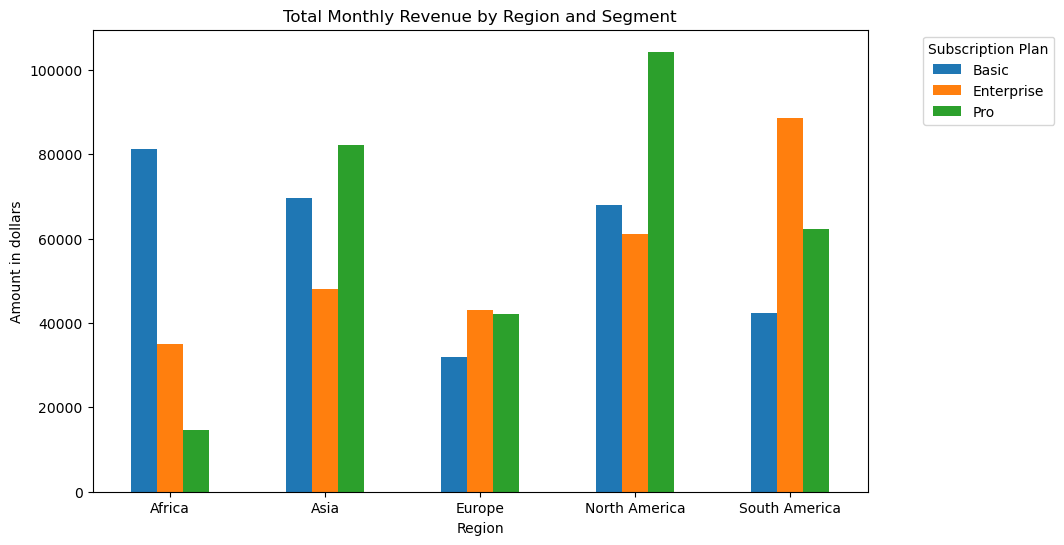

In [25]:
sub_reg_df_unstacked = sub_reg_df.unstack(level="Subscription_Plan")
sub_reg_df_unstacked["Total_Monthly_Revenue"].plot(kind="bar", figsize=(10,6))
plt.title("Total Monthly Revenue by Region and Segment")
plt.xlabel("Region")
plt.ylabel("Amount in dollars")
plt.xticks(rotation=0)
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()

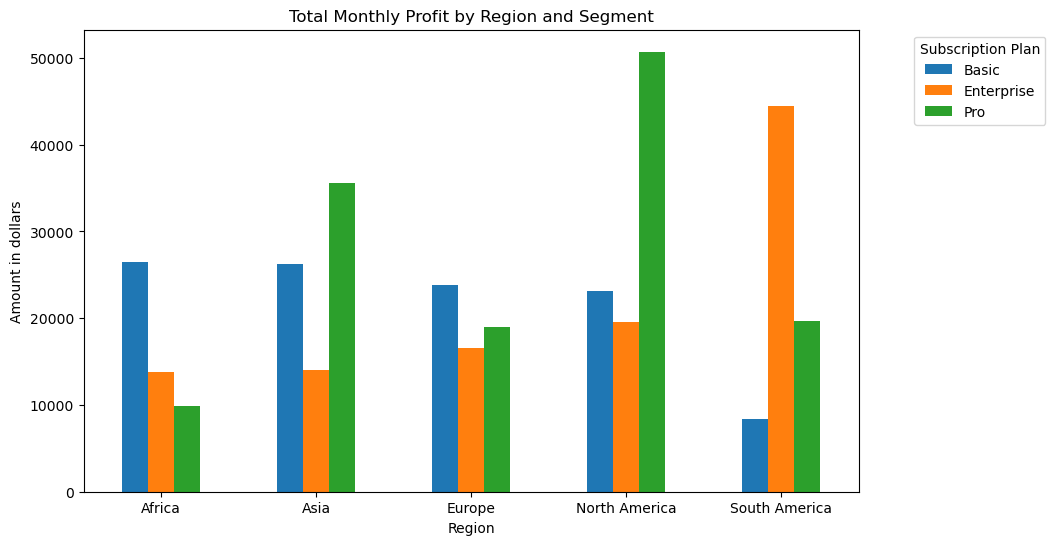

In [23]:
sub_reg_df_unstacked = sub_reg_df.unstack(level="Subscription_Plan")
sub_reg_df_unstacked["Total_Monthly_Profit"].plot(kind="bar", figsize=(10,6))
plt.title("Total Monthly Profit by Region and Segment")
plt.xlabel("Region")
plt.ylabel("Amount in dollars")
plt.xticks(rotation=0)
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()

In [33]:
sub_reg_df["Profit_Margin"] = (sub_reg_df["Total_Monthly_Profit"] / sub_reg_df["Total_Monthly_Revenue"]*100)
display(sub_reg_df)

Total_Monthly_Profit  Total_Monthly_Revenue  \
Region        Subscription_Plan                                                
Africa        Basic                          26521.00               81161.09   
              Enterprise                     13772.69               35083.14   
              Pro                             9882.30               14720.99   
Asia          Basic                          26196.65               69540.74   
              Enterprise                     13975.84               48063.99   
              Pro                            35533.50               82137.77   
Europe        Basic                          23836.47               31978.09   
              Enterprise                     16572.56               43200.99   
              Pro                            19038.55               42103.53   
North America Basic                          23151.09               67992.54   
              Enterprise                     19588.84               61047.59   
              Pro                            50723.23              104341.97   
South America Basic                           8343.96               42300.86   
              Enterprise                     44500.23               88512.60   
              Pro                            19670.36               62205.37   

                                 Profit_Margin  
Region        Subscription_Plan                 
Africa        Basic                  32.676988  
              Enterprise             39.257290  
              Pro                    67.130675  
Asia          Basic                  37.670939  
              Enterprise             29.077569  
              Pro                    43.260853  
Europe        Basic                  74.540005  
              Enterprise             38.361528  
              Pro                    45.218418  
North America Basic                  34.049456  
              Enterprise             32.087819  
              Pro                    48.612490  
South America Basic                  19.725273  
              Enterprise             50.275588  
              Pro                    31.621643

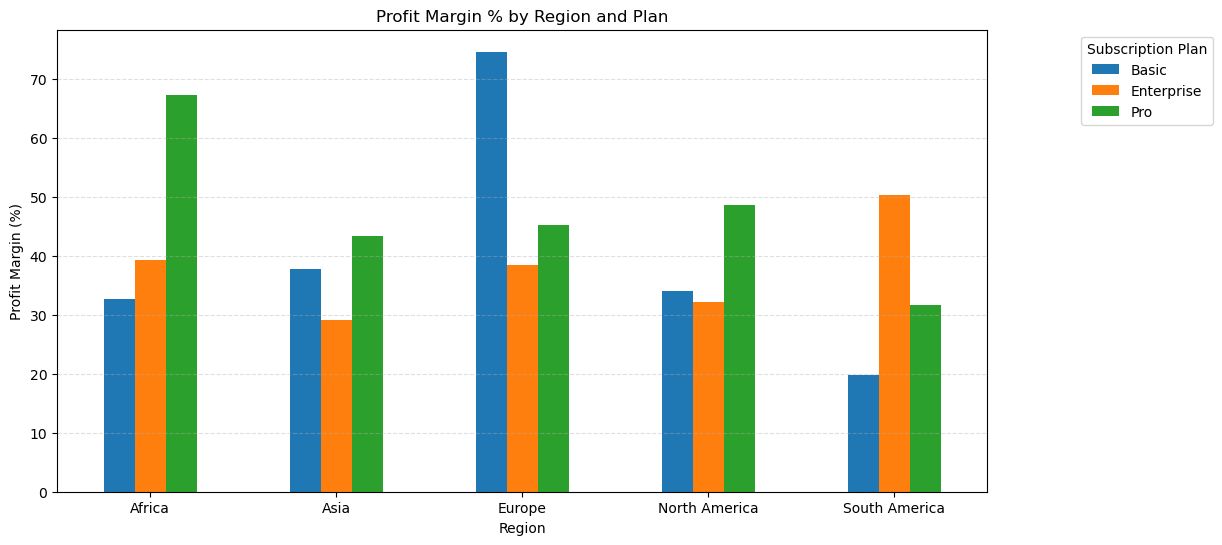

In [41]:
sub_reg_margin_unstacked = sub_reg_df.unstack(level="Subscription_Plan")
sub_reg_margin_unstacked["Profit_Margin"].plot(kind="bar", figsize=(12,6))
plt.title("Profit Margin % by Region and Plan")
plt.xlabel("Region")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()


In [ ]:
# At this point - I feel almost like I've covered these dataframes ad nauseam! Going to generate some Salesforce
# and Outreach CSVs so that I can practice with slightly different data. 
